In [2]:
#Importing Libraries
import pandas.util.testing as tm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Reading data
data = pd.read_csv('creditcard.csv')

In [13]:
# Checking the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]
print('No. of rows: %d'% rows)
print('No. of columns: %d'% columns)

No. of rows: 284807
No. of columns: 31


In [5]:
# Getting info about the attributes of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Checking if there are any null values
data.isnull().values.any()

False

In [9]:
#Getting the statistical summary of the data
pd.set_option('precision',4)
data.loc[:,['Time','Amount']].describe()

,Time,Amount
count,284807.0000,284807.0000
mean,94813.8596,88.3496
std,47488.1460,250.1201
min,0.0000,0.0000
25%,54201.5000,5.6000
50%,84692.0000,22.0000
75%,139320.5000,77.1650
max,172792.0000,25691.1600


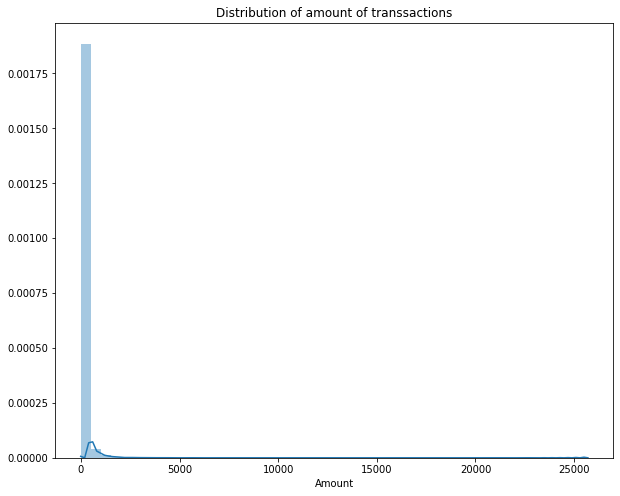

In [10]:
# Plotting the distribution of transaction amounts
plt.figure(figsize=(10,8))
plt.title('Distribution of amount of transsactions')
sns.distplot(data.Amount)

As we can see that majority of the transaction amounts are relatively small and only a few transactions come close to the maximum.
Hence, we can say that the data is highly right-skewed.
We can also justify this fact by looking at the values of mean, max and min of transaction amounts.

In [17]:
#normal and fraud transactions
counts = data.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
print('No. of normal transaction: %d'%normal)
print('No. of fraudulent transaction: %d'%fraudulent)

No. of normal transaction: 284315
No. of fraudulent transaction: 492


Text(0.5, 0, '0:Normal,1:Fraudulent')

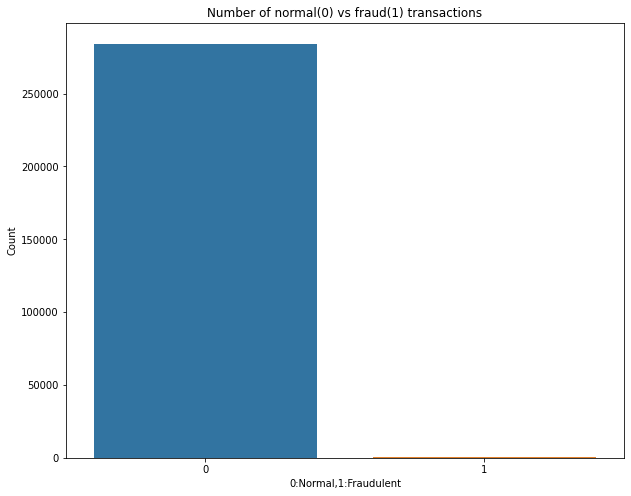

In [18]:
# Plotting normal vs fraud transactions
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index,y=counts)
plt.title('Number of normal(0) vs fraud(1) transactions')
plt.ylabel('Count')
plt.xlabel('0:Normal,1:Fraudulent')

In [19]:
# Correlation matrix
corr = data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.0000,1.1740e-01,-1.0593e-02,-4.1962e-01,-1.0526e-01,1.7307e-01,-6.3016e-02,8.4714e-02,-3.6949e-02,-8.6604e-03,3.0617e-02,-2.4769e-01,1.2435e-01,-6.5902e-02,-9.8757e-02,-1.8345e-01,1.1903e-02,-7.3297e-02,9.0438e-02,2.8975e-02,-5.0866e-02,4.4736e-02,1.4406e-01,5.1142e-02,-1.6182e-02,-2.3308e-01,-4.1407e-02,-5.1346e-03,-9.4127e-03,-0.0106,-0.0123
V1,0.1174,1.0000e+00,4.6974e-17,-1.4244e-15,1.7553e-17,6.3912e-17,2.3981e-16,1.9916e-15,-9.4907e-17,2.1696e-16,7.4338e-17,2.4386e-16,2.4221e-16,-2.1155e-16,9.3526e-16,-3.2525e-16,6.3088e-16,-5.0115e-16,2.8701e-16,1.8181e-16,1.0370e-16,-1.7551e-16,7.4774e-17,9.8087e-16,7.3543e-17,-9.8054e-16,-8.6219e-17,3.2082e-17,9.8209e-16,-0.2277,-0.1013
V2,-0.0106,4.6974e-17,1.0000e+00,2.5122e-16,-1.1264e-16,-2.0399e-16,5.0247e-16,3.9665e-16,-4.4140e-17,-5.7287e-17,-4.7824e-16,9.4690e-16,-6.5883e-16,3.8545e-16,-2.5410e-16,2.8311e-16,4.9341e-17,-9.8830e-16,2.6367e-16,9.5283e-17,-9.3100e-16,8.4444e-17,2.5008e-16,1.0596e-16,-8.1424e-18,-4.2619e-17,2.6016e-16,-4.4785e-16,-3.6764e-16,-0.5314,0.0913
V3,-0.4196,-1.4244e-15,2.5122e-16,1.0000e+00,-3.4169e-16,-1.4365e-15,1.4316e-15,2.1686e-15,3.4331e-16,-4.2338e-16,6.2893e-16,-5.5018e-17,2.2065e-16,-6.8834e-16,4.2713e-16,1.1228e-16,1.1834e-15,4.5766e-17,5.4280e-16,2.5768e-16,-9.4293e-16,-2.9720e-17,4.6483e-16,2.1152e-17,-9.3516e-17,4.7712e-16,6.5215e-16,6.2398e-16,7.7269e-16,-0.2109,-0.1930
V4,-0.1053,1.7553e-17,-1.1264e-16,-3.4169e-16,1.0000e+00,-1.9409e-15,-2.7127e-16,1.5563e-16,5.1956e-16,3.8596e-16,6.0555e-16,-2.0836e-16,-5.6580e-16,-1.5061e-16,-8.5224e-17,-1.5077e-16,-6.9392e-16,-4.3979e-16,1.4937e-16,-2.6569e-16,-3.2231e-16,-9.9769e-17,2.0999e-16,6.0025e-17,2.2297e-16,5.3946e-16,-6.1798e-16,-6.4034e-17,-5.8637e-17,0.0987,0.1334
V5,0.1731,6.3912e-17,-2.0399e-16,-1.4365e-15,-1.9409e-15,1.0000e+00,7.9264e-16,-4.2099e-16,7.5892e-16,4.2052e-16,-6.6017e-16,7.3428e-16,3.7610e-16,-9.5787e-16,-3.6348e-16,-5.1326e-16,-3.5171e-16,1.4257e-16,1.1095e-15,-3.1382e-16,2.0760e-16,-1.3687e-16,5.0600e-16,1.6376e-16,-9.2861e-16,5.6251e-16,9.1447e-16,4.4660e-16,-3.2992e-16,-0.3864,-0.0950
V6,-0.0630,2.3981e-16,5.0247e-16,1.4316e-15,-2.7127e-16,7.9264e-16,1.0000e+00,1.4294e-16,-1.7074e-16,1.1144e-16,2.8508e-16,4.8658e-16,2.1406e-16,-2.2681e-16,3.4528e-16,-6.3681e-18,-2.4779e-16,3.5676e-16,2.8115e-16,2.7172e-16,1.8986e-16,-1.5759e-16,-3.3629e-16,-7.2322e-17,-1.2619e-15,1.0819e-15,-2.3784e-16,-2.6238e-16,4.8132e-16,0.2160,-0.0436
V7,0.0847,1.9916e-15,3.9665e-16,2.1686e-15,1.5563e-16,-4.2099e-16,1.4294e-16,1.0000e+00,-8.6918e-17,7.9333e-16,3.0433e-17,-1.0841e-15,1.5100e-15,-9.8923e-17,-1.7295e-16,1.9368e-17,2.8937e-16,1.1497e-15,-1.1168e-16,-2.8740e-16,1.7442e-16,1.9386e-16,-1.0581e-15,2.3279e-16,-2.5897e-17,1.1742e-15,-7.3345e-16,-5.8868e-16,-6.8368e-17,0.3973,-0.1873
V8,-0.0369,-9.4907e-17,-4.4140e-17,3.4331e-16,5.1956e-16,7.5892e-16,-1.7074e-16,-8.6918e-17,1.0000e+00,2.9008e-16,9.0518e-17,1.9547e-16,-6.2661e-17,-2.3829e-16,-1.1311e-16,2.0215e-16,5.0272e-16,-3.5088e-16,-4.0939e-16,-5.3398e-16,-1.0955e-16,-2.4124e-16,5.4756e-16,3.8971e-16,-1.8030e-16,-1.3908e-16,-1.2100e-16,1.7336e-16,-4.4843e-16,-0.1031,0.0199
V9,-0.0087,2.1696e-16,-5.7287e-17,-4.2338e-16,3.8596e-16,4.2052e-16,1.1144e-16,7.9333e-16,2.9008e-16,1.0000e+00,-2.7718e-16,4.6823e-16,-2.4452e-15,-2.6504e-16,2.3433e-16,-1.5881e-15,-3.2519e-16,6.5360e-16,1.2038e-16,1.1208e-16,-4.3409e-16,4.5784e-17,2.8719e-17,5.9293e-16,-2.3464e-16,1.0996e-15,-1.3887e-15,-2.2874e-16,9.1468e-16,-0.0442,-0.0977


Text(0.5, 1.0, 'Correlation heatmap')

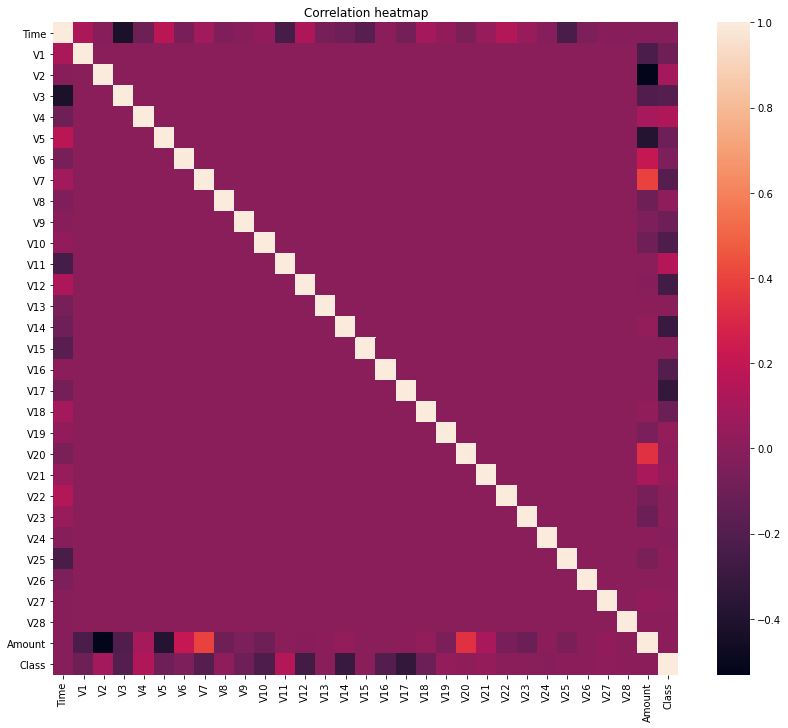

In [21]:
#Heatmap
plt.figure(figsize=(14,12))
heat = sns.heatmap(data=corr)
plt.title('Correlation heatmap')

We use heatmap to visualize if there are any strong correlations between our predictors/attribute, especially with our class variable.

Although, the anonymized features (generated using Principal Component Analysis(PCA)) have been scaled and centred around zero, our time and amount features have not. As we saw earlier, these features are highly skewed, hence scaling them is important otherwise it would result in bad performance of machine learning algorithms like logistic regression (give weights to features) or KNN (rely on distance measure)

In [22]:
skewness = data.skew()
skewness

Time      -0.0356
V1        -3.2807
V2        -4.6249
V3        -2.2402
V4         0.6763
V5        -2.4259
V6         1.8266
V7         2.5539
V8        -8.5219
V9         0.5547
V10        1.1871
V11        0.3565
V12       -2.2784
V13        0.0652
V14       -1.9952
V15       -0.3084
V16       -1.1010
V17       -3.8449
V18       -0.2599
V19        0.1092
V20       -2.0372
V21        3.5930
V22       -0.2133
V23       -5.8751
V24       -0.5525
V25       -0.4158
V26        0.5767
V27       -1.1702
V28       11.1921
Amount    16.9777
Class     23.9976
dtype: float64

In [34]:
# scaling time and amount columns
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()

time_scaled = scaler1.fit_transform(data[['Time']])
flat_list1 = [item for sublist in time_scaled.tolist() for item in sublist]
time_scaled = pd.Series(flat_list1)

In [35]:
amount_scaled = scaler2.fit_transform(data[['Amount']])
flat_list2 = [item for sublist in amount_scaled.tolist() for item in sublist]
amount_scaled = pd.Series(flat_list2)

In [40]:
#concatinating the scaled time and amount columns with our dataframe
data  = pd.concat([data,amount_scaled.rename('amount_scaled'),time_scaled.rename('time_scaled')],axis=1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,amount_scaled,time_scaled
0,0.0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.62,0,0.2450,-1.9966
1,0.0,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.69,0,-0.3425,-1.9966
2,1.0,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.66,0,1.1607,-1.9966
3,1.0,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.50,0,0.1405,-1.9966
4,2.0,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.99,0,-0.0734,-1.9965


In [42]:
# dropping the original time and amount columns
data.drop(columns=['Amount','Time'],axis=1,inplace=True)

# Creating training set from highly imbalanced data
As we saw earlier, the number of normal/non-fraudulent transactions are very high as compared to that of fraudulent transactions. If we use this data, an algorithm that always predict that the transaction is non-fraudulent would achieve an accuracy higher than 99%. 
Hence, we will use random under-sampling to create a training dataset with balanced class distribution.

In [49]:
m = np.random.rand(len(data)) < 0.9
train_set = data[m]
test_set = data[~m]
print('Shape of training data: {} and test data: {}'.format(train_set.shape,test_set.shape))

Shape of training data: (256472, 31) and test data: (28335, 31)


In [52]:
train_set.reset_index(drop=True,inplace=True)
test_set.reset_index(drop=True,inplace=True)

In [57]:
# Creating sample of data with balanced cass distributions
no_fraud_train = train_set.Class.value_counts()[1]

non_fraud_data = train_set[train_set['Class']==0]
fraud_data = train_set[train_set['Class']==1]

selected_non_fraud_data = non_fraud_data.sample(no_fraud_train)
selected_non_fraud_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
241053,-2.2768,-2.4318,0.6462,-0.1498,1.0699,-1.3067,1.2972,-0.3038,0.3578,-1.0685,-1.1575,-0.2469,-0.8169,0.0626,-0.4377,-0.6077,-0.1761,-0.3104,0.1061,1.2649,0.2381,-0.2850,1.0504,-0.0717,0.2540,-0.1243,-0.2862,-0.0359,0,1.3104,1.4328
142540,2.1029,-0.0494,-1.4616,0.3389,0.2522,-0.7581,-0.0527,-0.2573,2.3223,-0.4176,-0.3460,-3.2422,-0.0121,2.2425,0.3763,-0.1299,0.1803,0.6930,-0.2693,-0.3735,0.0753,0.5282,0.0118,0.3879,0.3073,-0.4695,-0.0350,-0.0599,0,-0.3492,0.3435
112779,1.2925,-1.0418,1.1563,-0.4463,-1.4172,0.4731,-1.3303,0.1400,0.3488,0.2781,-1.5155,0.1566,1.4421,-1.4733,-0.8737,0.9777,0.3282,-1.1253,1.1176,0.2431,0.1590,0.6841,-0.2349,-0.3475,0.5737,-0.0293,0.0748,0.0302,0,-0.1432,-0.3624
220324,0.2082,1.0276,-0.8212,-0.7899,1.4672,-0.1662,0.9663,-0.0422,-0.0374,-0.8527,-1.4802,-0.2306,0.5580,-1.1474,-0.1594,0.5503,0.0333,-0.0212,0.0778,0.0706,-0.3977,-0.9665,-0.0263,-0.4696,-0.2881,0.1787,0.2265,0.0744,0,-0.3390,1.2132
213635,1.9493,-0.4556,-0.3064,0.2803,-0.5056,0.1355,-0.7576,0.1368,0.8761,0.1465,0.8601,1.4221,0.8319,-0.2276,-0.3955,0.4941,-0.7863,0.4198,0.0143,-0.0999,0.2195,0.8153,0.1818,0.8421,-0.2726,0.5099,-0.0232,-0.0475,0,-0.3073,1.1437


In [58]:
len(selected_non_fraud_data)

440

In [65]:
selected_non_fraud_data.reset_index(drop=True,inplace=True)
fraud_data.reset_index(drop=True,inplace=True)

final_sample = pd.concat([selected_non_fraud_data,fraud_data])

In [66]:
len(final_sample)
final_sample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-2.2768,-2.4318,0.6462,-0.1498,1.0699,-1.3067,1.2972,-0.3038,0.3578,-1.0685,-1.1575,-0.2469,-0.8169,0.0626,-0.4377,-0.6077,-0.1761,-0.3104,0.1061,1.2649,0.2381,-0.2850,1.0504,-0.0717,0.2540,-0.1243,-0.2862,-0.0359,0,1.3104,1.4328
1,2.1029,-0.0494,-1.4616,0.3389,0.2522,-0.7581,-0.0527,-0.2573,2.3223,-0.4176,-0.3460,-3.2422,-0.0121,2.2425,0.3763,-0.1299,0.1803,0.6930,-0.2693,-0.3735,0.0753,0.5282,0.0118,0.3879,0.3073,-0.4695,-0.0350,-0.0599,0,-0.3492,0.3435
2,1.2925,-1.0418,1.1563,-0.4463,-1.4172,0.4731,-1.3303,0.1400,0.3488,0.2781,-1.5155,0.1566,1.4421,-1.4733,-0.8737,0.9777,0.3282,-1.1253,1.1176,0.2431,0.1590,0.6841,-0.2349,-0.3475,0.5737,-0.0293,0.0748,0.0302,0,-0.1432,-0.3624
3,0.2082,1.0276,-0.8212,-0.7899,1.4672,-0.1662,0.9663,-0.0422,-0.0374,-0.8527,-1.4802,-0.2306,0.5580,-1.1474,-0.1594,0.5503,0.0333,-0.0212,0.0778,0.0706,-0.3977,-0.9665,-0.0263,-0.4696,-0.2881,0.1787,0.2265,0.0744,0,-0.3390,1.2132
4,1.9493,-0.4556,-0.3064,0.2803,-0.5056,0.1355,-0.7576,0.1368,0.8761,0.1465,0.8601,1.4221,0.8319,-0.2276,-0.3955,0.4941,-0.7863,0.4198,0.0143,-0.0999,0.2195,0.8153,0.1818,0.8421,-0.2726,0.5099,-0.0232,-0.0475,0,-0.3073,1.1437


In [67]:
# shuffling our sample data
final_sample = final_sample.sample(frac=1).reset_index(drop=True)

In [68]:
final_sample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-1.1416,1.9277,-3.9054,-0.0739,-0.0449,-1.7570,-1.2174,0.3646,-2.7701,-3.2162,1.2867,-3.2727,1.0422,-5.7489,-0.6681,-3.8660,-2.7051,-0.1039,-0.7168,-0.2506,0.1021,-0.5315,-0.3287,0.3931,0.5684,0.7866,-0.1461,0.0762,1,-0.2533,0.6613
1,2.0955,-0.0964,-1.4870,0.0423,0.4823,-0.2594,0.0907,-0.1453,0.2850,0.2299,0.0710,1.0198,0.6370,0.3140,-0.6328,0.3844,-0.9584,-0.0791,0.8397,-0.1479,-0.3031,-0.7474,0.1884,-1.0853,-0.1685,0.2439,-0.0729,-0.0800,0,-0.3453,1.3179
2,-3.6141,-3.4437,1.5718,-1.7650,2.8649,-2.2481,-2.8179,-1.1571,-1.5138,1.8221,-0.8026,-1.2968,0.0503,-0.6188,0.7097,-0.2938,0.3197,-0.4479,-0.6235,-2.2785,-0.0230,-0.6071,-1.7218,-0.3017,0.1306,-0.1978,0.6854,-0.5290,0,-0.2073,-0.6523
3,-18.4749,11.5864,-21.4029,6.0385,-14.4512,-4.1465,-14.8561,12.4311,-4.0534,-9.0404,5.9662,-8.4640,0.0787,-9.0925,0.0108,-7.1864,-13.7975,-4.9585,1.3212,1.5779,1.7411,-1.2511,-0.3962,0.0957,1.3228,-0.2180,1.6288,0.4822,1,0.0465,-1.4381
4,-0.5499,-0.4403,1.2887,0.6350,-0.3515,-0.0916,-0.3881,0.1876,-1.4059,1.1243,1.1949,-0.0341,-0.7503,0.4902,0.8359,-1.6507,0.1311,1.5568,-0.2815,-0.5583,-0.2804,-0.3624,0.4163,0.1347,-1.7078,-0.7016,0.2772,0.2549,0,-0.0134,-1.4635


Text(0.5, 0, '0:Non-Fraud,1:Fraud')

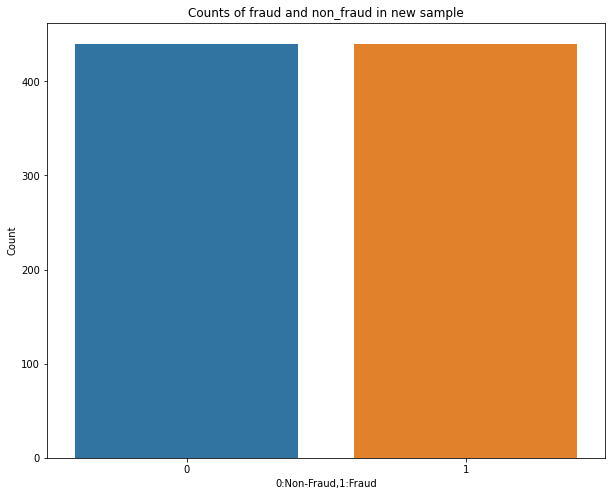

In [69]:
new_counts = final_sample.Class.value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=new_counts.index,y=new_counts)
plt.title('Counts of fraud and non_fraud in new sample')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraud,1:Fraud')

In [70]:
# correlations with the target variable
corr = final_sample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.4374
V2,0.4969
V3,-0.5728
V4,0.7204
V5,-0.3761
V6,-0.4167
V7,-0.4743
V8,0.0873
V9,-0.5615
V10,-0.6415


In [72]:
#negative correlation <-0.5
corr[corr.Class<-0.55]

,Class
V3,-0.5728
V9,-0.5615
V10,-0.6415
V12,-0.6819
V14,-0.7515
V16,-0.5964
V17,-0.5581


In [73]:
# positive correlation >0.5
corr[corr.Class>0.55]

,Class
V4,0.7204
V11,0.6906
Class,1.0000


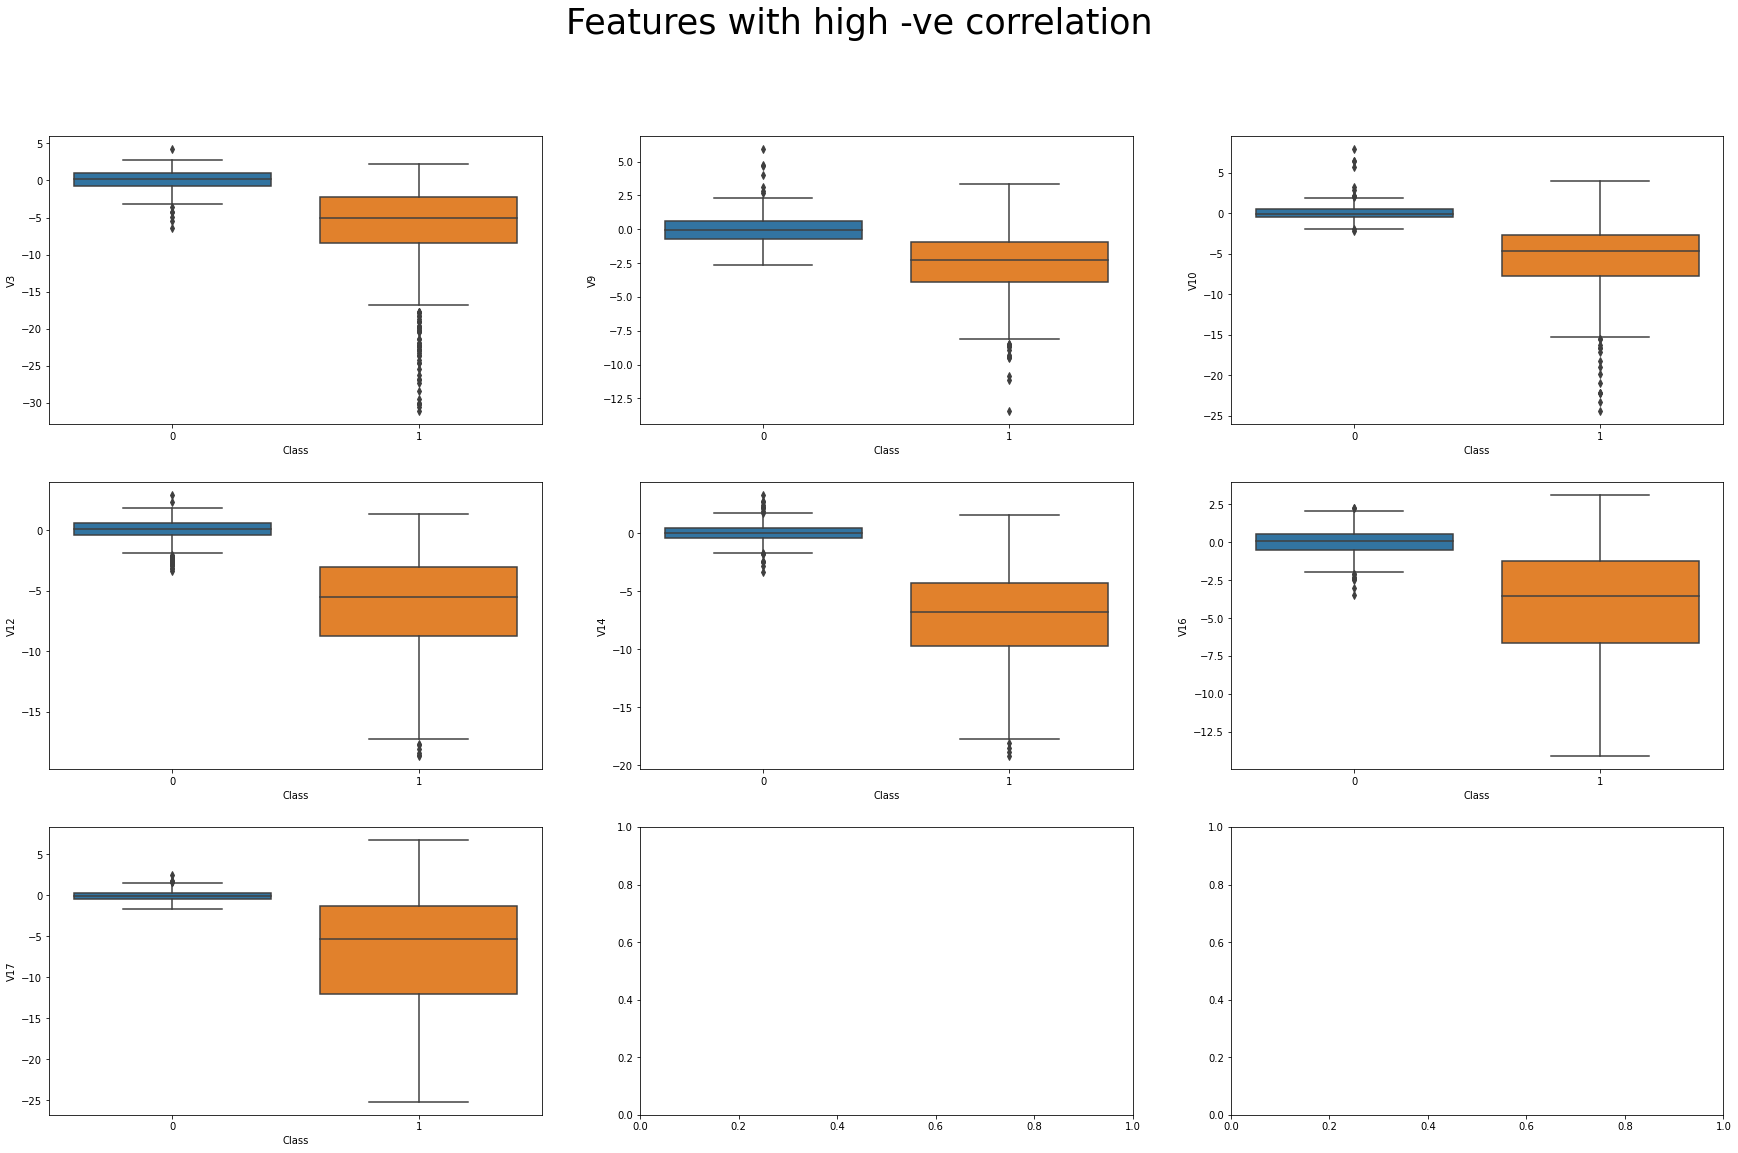

In [78]:
f,axes = plt.subplots(nrows=3,ncols=3,figsize=(30,18))

f.suptitle('Features with high -ve correlation',size=35)
sns.boxplot(x="Class",y="V3",data=final_sample,ax=axes[0,0])
sns.boxplot(x="Class",y="V9",data=final_sample,ax=axes[0,1])
sns.boxplot(x="Class",y="V10",data=final_sample,ax=axes[0,2])
sns.boxplot(x="Class",y="V12",data=final_sample,ax=axes[1,0])
sns.boxplot(x="Class",y="V14",data=final_sample,ax=axes[1,1])
sns.boxplot(x="Class",y="V16",data=final_sample,ax=axes[1,2])
sns.boxplot(x="Class",y="V17",data=final_sample,ax=axes[2,0])

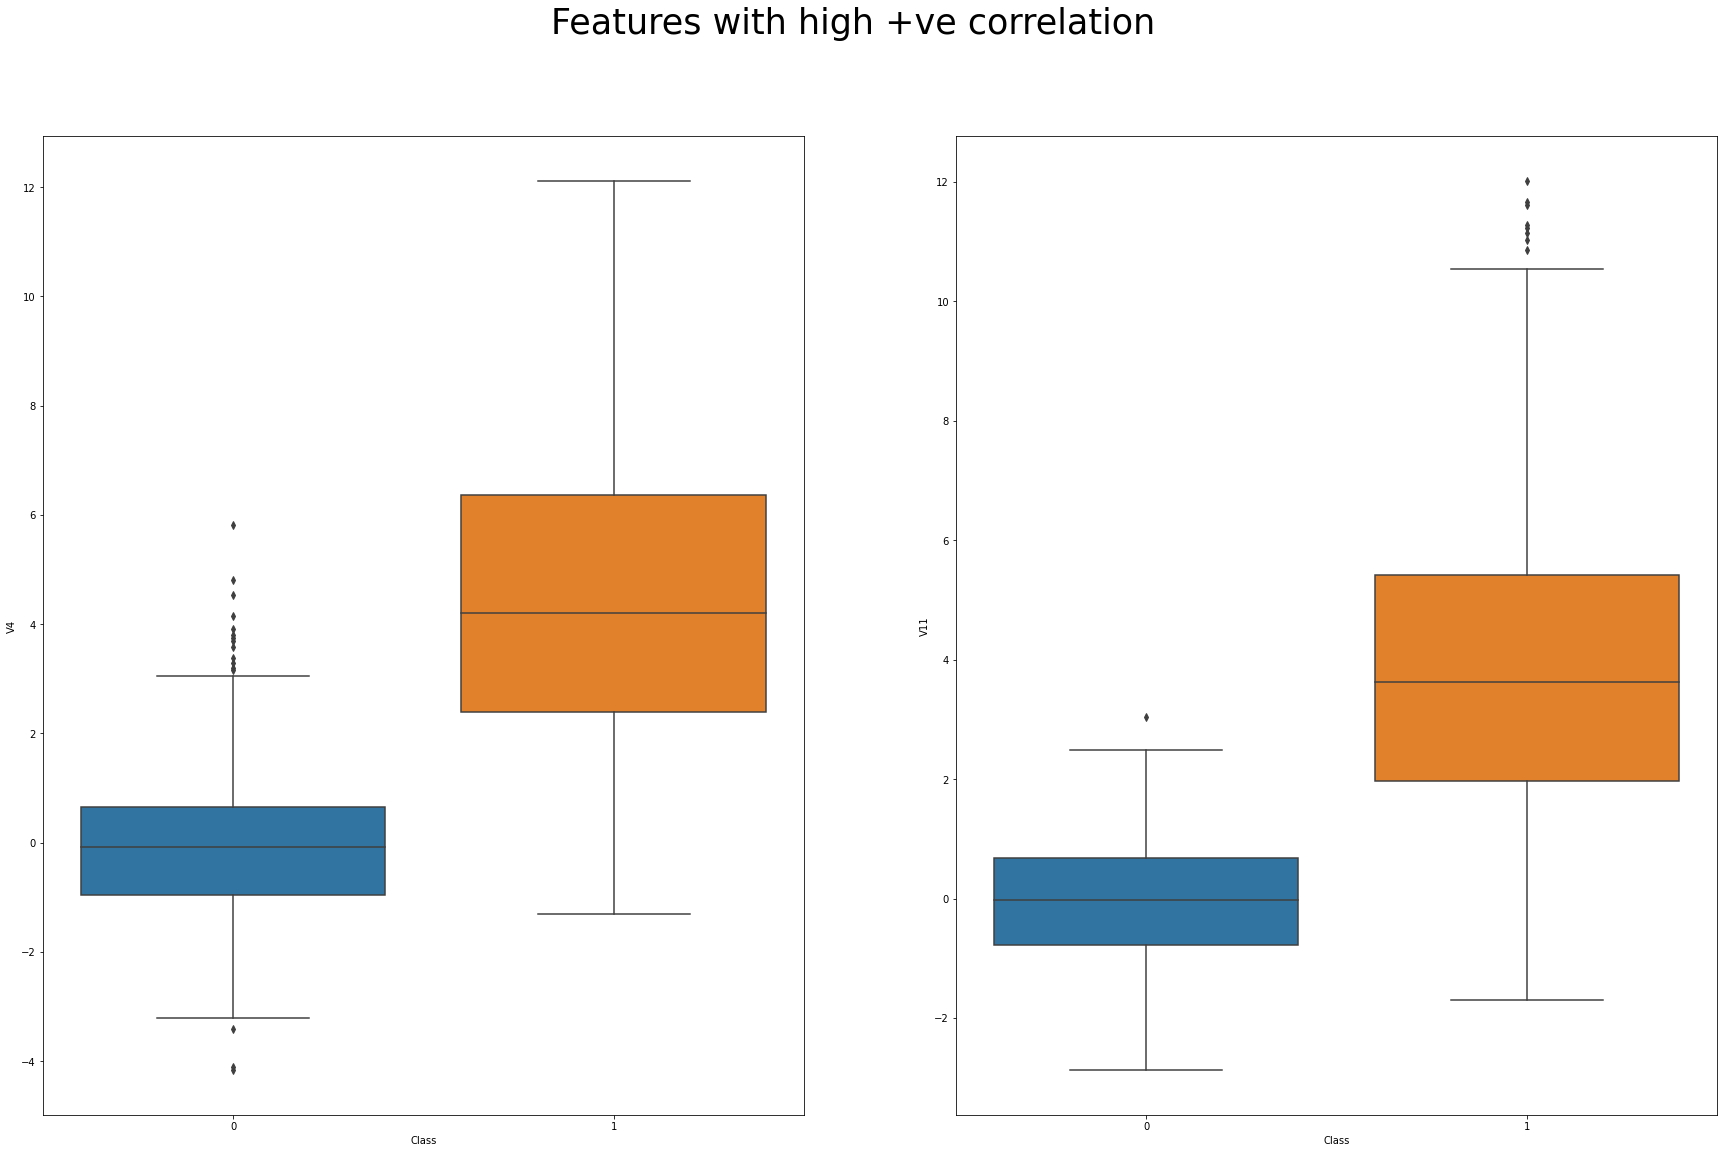

In [81]:
f,axes = plt.subplots(nrows=1,ncols=2,figsize=(30,18))

f.suptitle('Features with high +ve correlation',size=35)
sns.boxplot(x="Class",y="V4",data=final_sample,ax=axes[0])
sns.boxplot(x="Class",y="V11",data=final_sample,ax=axes[1])

In [82]:
# outlier removal
q1 = final_sample.quantile(0.25)
q3 = final_sample.quantile(0.75)
iqr = q3-q1

df = final_sample[~((final_sample<(q1-2.5*iqr)) | (final_sample>(q3+2.5*iqr))).any(axis=1)]

print('Sample length with outliers: ',len(final_sample))
print('Sample length after removing outliers',len(df))

Sample length with outliers:  880
Sample length after removing outliers 627


In [84]:
from sklearn.manifold import TSNE

X = df.drop('Class',axis=1)
Y = df['Class']

X_reduced_tsne = TSNE(n_components=2,random_state=42).fit_transform(X.values)

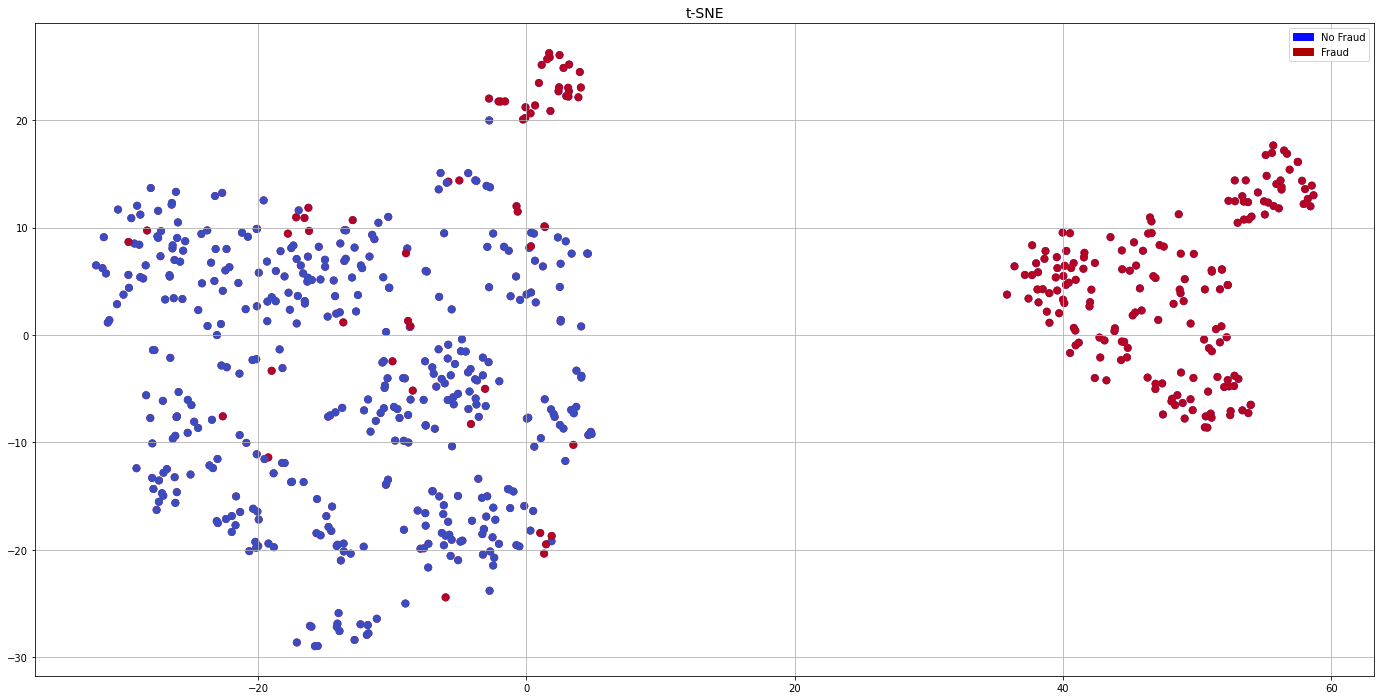

In [87]:
import matplotlib.patches as mpatches

f,ax = plt.subplots(figsize=(24,12))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(Y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(Y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [88]:
# splitting the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [89]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (501, 30) (126, 30) 

Y_shapes:
 Y_train: Y_validation:
 (501,) (126,)


In [90]:
#importing various popular classification algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [92]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [93]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.982624 (0.021278)
LDA: 0.979892 (0.020772)
KNN: 0.968576 (0.021865)
CART: 0.921544 (0.041393)
SVM: 0.982358 (0.017697)
XGB: 0.985330 (0.012382)
RF: 0.974561 (0.022875)


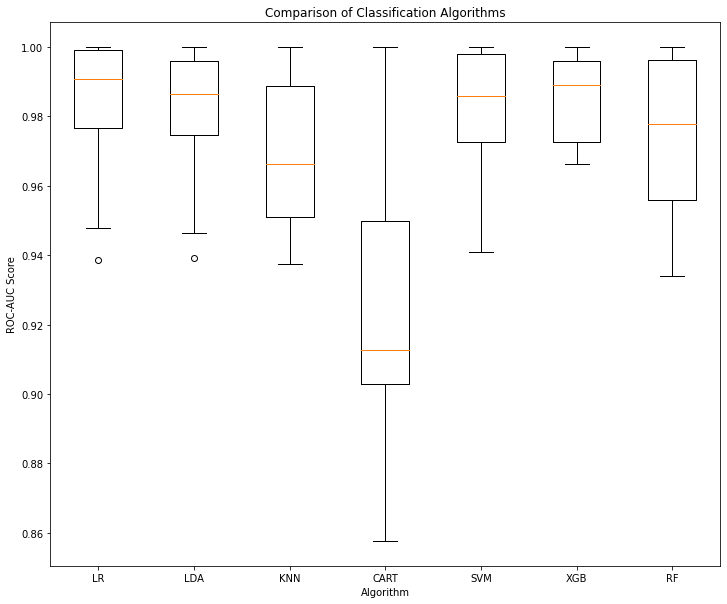

In [94]:
#Comparing the algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()